# **Random Forests**

#### **Learning Points**
- Define random forests.
- Explain the steps of fitting a random forest.
- Interpret a random forest.
- Implement a random forest model in scikit-learn.

#### **Random forest classifier**
While decision trees are powerful tools, trees are prone to overfitting to the training data, working well on the training data, but not on new data. An extension of the decision tree, the random forest, usually results in a better model.

A **random forest** is a collection of many decision trees. For a training set of size N with M features, each tree is grown by selecting N cases at random with replacement. This process is known as bootstrap aggregating or bagging. At each node, m < N randomly selected features are considered for the split, and the best option is chosen. Due to these two layers of randomization, the decision trees have low correlation. When the model is used for classification, each new instance is sent down all the trees, and the majority result is taken as the resulting outcome.

#### **Constructing classification random forests in Python**
The rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt', criterion='gini', bootstrap=True) function is used to build a random forest model and save it to rfc. The parameter max_features sets the number of features to choose from at each node. The parameter n_estimators specifies the number of trees to grow in the forest.The rest of the parameters and matching values are found in the scikit-learn documentation. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

After initialization, the tree must be fit to the data with rfc.fit(X, y) where X is a dataframe of features and y is the vector of outcomes.

The Python code below fits a classification random forest for predicting species of penguins from the Palmer Penguins dataset.



In [2]:
# Import packages and functions
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
# Load the penguins data from palmerpenguins module
penguins = pd.read_csv('/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/penguins.csv')

# Drop penguins with missing values
penguins = penguins.dropna()

# Calculate summary statistics using .describe()
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


In [4]:
# y = output features
y = penguins['species']

# X = input features
X = penguins.drop('species', axis=1)

# Convert categorical inputs like species and island into dummy variables
X = pd.get_dummies(X, drop_first=True)

X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,True,False
5,39.3,20.6,190.0,3650.0,2007,False,True,True
...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,True,False,True
340,43.5,18.1,202.0,3400.0,2009,True,False,False
341,49.6,18.2,193.0,3775.0,2009,True,False,True
342,50.8,19.0,210.0,4100.0,2009,True,False,True


In [5]:
# Create a training/testing split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=8675309
)

# Initialize the random forest model
rfModel = RandomForestClassifier(max_depth=2, max_features='sqrt', random_state=99)

# Fit the random forest model on the training data
rfModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=99)

In [6]:
pd.DataFrame(
    data={
        'feature': rfModel.feature_names_in_,
        'importance': rfModel.feature_importances_,
    }
).sort_values('importance', ascending=False)

,feature,importance
2,flipper_length_mm,0.233537
1,bill_depth_mm,0.221468
0,bill_length_mm,0.215703
3,body_mass_g,0.192141
5,island_Dream,0.108376
6,island_Torgersen,0.026108
7,sex_male,0.001715
4,year,0.000951


In [7]:
# Predict species on the testing data
y_pred = rfModel.predict(X_test)

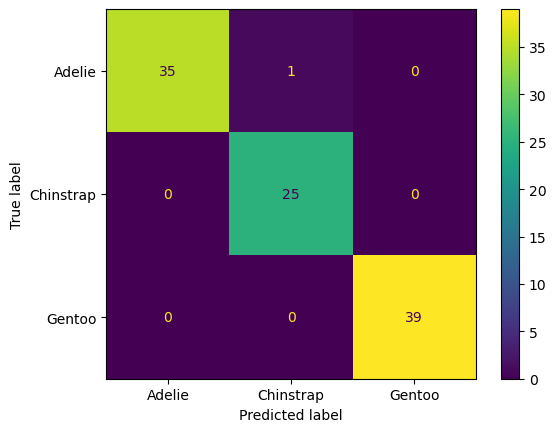

In [8]:
# Calculate a confusion matrix
metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [9]:
# Calculate the Gini index
probs = pd.DataFrame(data=rfModel.predict_proba(X_test))
print("Gini index ", (probs * (1 - probs)).mean().sum())

Gini index  0.35684541672184994


[Text(0.5, 0.8333333333333334, 'bill_depth_mm <= 16.35\ngini = 0.634\nsamples = 144\nvalue = [106, 47, 80]'),
 Text(0.25, 0.5, 'bill_length_mm <= 39.7\ngini = 0.049\nsamples = 48\nvalue = [2, 0, 77]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 46\nvalue = [0, 0, 77]'),
 Text(0.75, 0.5, 'island_Torgersen <= 0.5\ngini = 0.45\nsamples = 96\nvalue = [104, 47, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.514\nsamples = 72\nvalue = [64, 47, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 24\nvalue = [40, 0, 0]')]

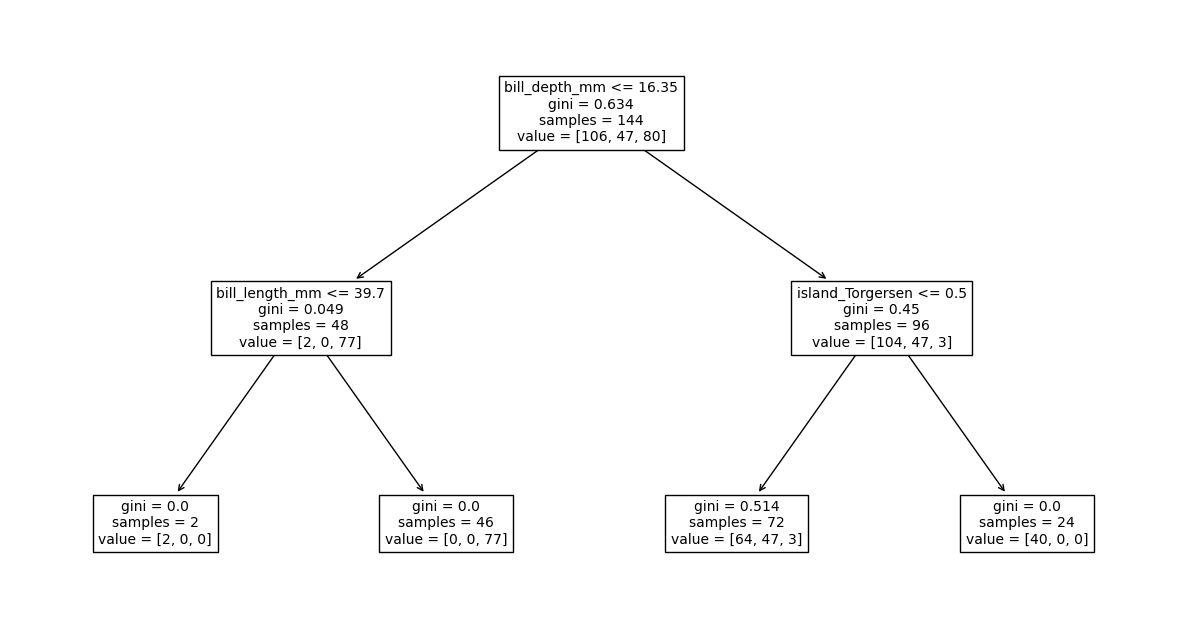

In [10]:
# Save the first random forest tree as singleTree
singleTree = rfModel.estimators_[0]

# Set image size
plt.figure(figsize=[15, 8])

# Plot a single regression tree
tree.plot_tree(singleTree, feature_names=X.columns, filled=False, fontsize=10)

#### **Constructing regression random forests in Python**
rfr = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_features='sqrt') initializes a regression random forest, rfr with 100 trees, using MSE as the metric, and choosing the square root of the number of features at each decision node. The rest of the parameters and matching values can be found in the scikit-learn documentation. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

After initialization, the tree must be fit to the data with rfr.fit(X, y) where X is a dataframe of features and y is the array of outcomes.

The Python code below fits a regression random forest for predicting body mass of penguins from the Palmer Penguins dataset.



In [11]:
# Import packages and functions

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [12]:
# Load the penguins data from palmerpenguins module
penguins = pd.read_csv('/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/penguins.csv')

# Drop penguins with missing values
penguins = penguins.dropna()

# Calculate summary statistics using .describe()
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


In [13]:
# Random forest models require all numerical inputs
# Convert categorical inputs like species and island into binary indicators

penguinDummies = pd.get_dummies(penguins, drop_first=True)

# Ex: species_Chinstrap = {1 if Chinstrap, 0 else}
penguinDummies

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False
5,39.3,20.6,190.0,3650.0,2007,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,True,False,True,False,True
340,43.5,18.1,202.0,3400.0,2009,True,False,True,False,False
341,49.6,18.2,193.0,3775.0,2009,True,False,True,False,True
342,50.8,19.0,210.0,4100.0,2009,True,False,True,False,True


In [14]:
# Save output features as y
y = penguinDummies["body_mass_g"]

# Save input features as X
X = penguinDummies.drop("body_mass_g", axis=1)

# Create a training/testing split
# 30% of instances held out for testing
# 70% of instances used for training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=8675309
)

# Define a regression random forest model
rfModel = RandomForestRegressor(max_depth=2, max_features='sqrt', random_state=99)

# Fit the model
rfModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, max_features='sqrt', random_state=99)

In [15]:
pd.DataFrame(
    data={
        'feature': rfModel.feature_names_in_,
        'importance': rfModel.feature_importances_,
    }
).sort_values('importance', ascending=False)

,feature,importance
5,species_Gentoo,0.335197
2,flipper_length_mm,0.298160
1,bill_depth_mm,0.192635
0,bill_length_mm,0.074698
8,sex_male,0.073244
6,island_Dream,0.019159
7,island_Torgersen,0.005201
4,species_Chinstrap,0.001357
3,year,0.000350


In [16]:
# Predict body mass on the testing data
y_pred = rfModel.predict(X_test)

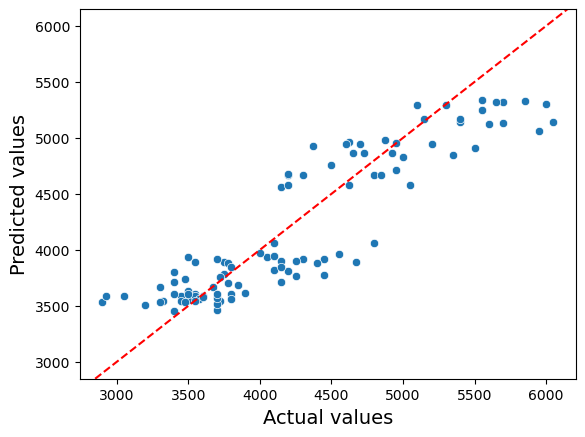

In [17]:
# Compare testing predictions to actual values
p = sns.scatterplot(x=y_test, y=y_pred)
p.set_xlabel("Actual values", fontsize=14)
p.set_ylabel("Predicted values", fontsize=14)

# Add a diagonal line
# If the testing predictions are close to the actual values,
# points should fall along this line
plt.axline((3000, 3000), (6000, 6000), color='r', ls='--')

In [18]:
# Print mean squared error (MSE)
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

MSE:  124443.9596902844


[Text(0.5, 0.8333333333333334, 'species_Gentoo <= 0.5\nsquared_error = 672940.973\nsamples = 144\nvalue = 4194.421'),
 Text(0.25, 0.5, 'bill_depth_mm <= 17.35\nsquared_error = 220257.593\nsamples = 95\nvalue = 3701.961'),
 Text(0.125, 0.16666666666666666, 'squared_error = 72046.046\nsamples = 22\nvalue = 3221.774'),
 Text(0.375, 0.16666666666666666, 'squared_error = 184440.549\nsamples = 73\nvalue = 3823.975'),
 Text(0.75, 0.5, 'bill_depth_mm <= 14.55\nsquared_error = 187842.188\nsamples = 49\nvalue = 5136.25'),
 Text(0.625, 0.16666666666666666, 'squared_error = 97439.308\nsamples = 16\nvalue = 4655.682'),
 Text(0.875, 0.16666666666666666, 'squared_error = 101305.18\nsamples = 33\nvalue = 5318.534')]

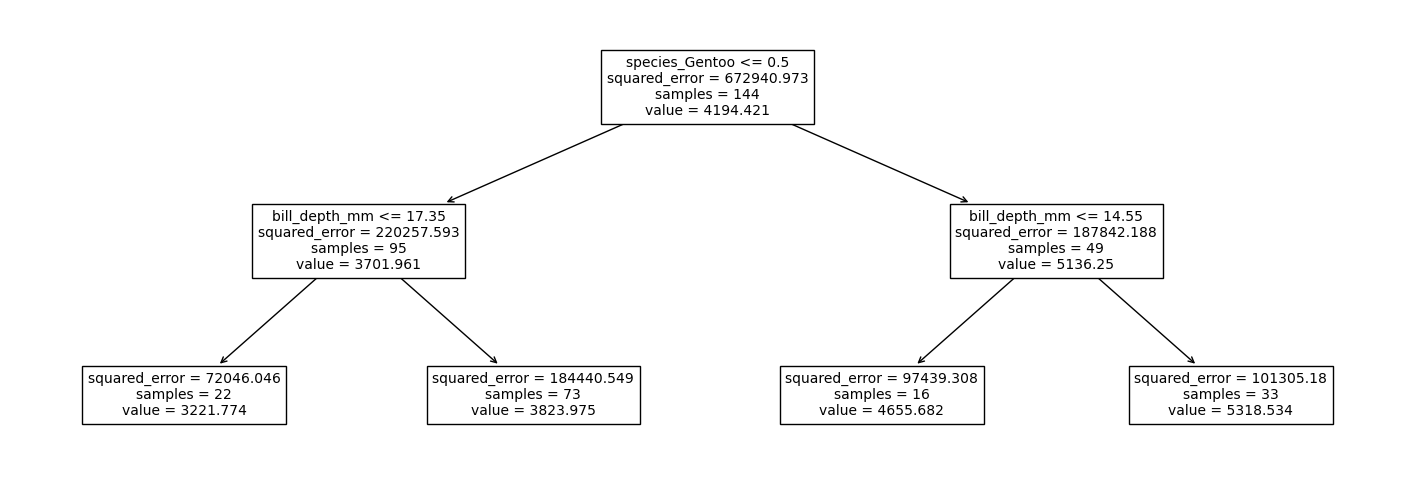

In [19]:
# Save the first random forest tree as singleTree
singleTree = rfModel.estimators_[0]

# Set image size
plt.figure(figsize=[18, 6])

# Plot a single regression tree
tree.plot_tree(singleTree, feature_names=X.columns, filled=False, fontsize=10)

In [20]:
# Calculate predictions from the single tree
y_pred_single = singleTree.predict(X_test)

# Which has lower error: the single tree or the random forest?
print("MSE single tree: ", metrics.mean_squared_error(y_test, y_pred_single))

MSE single tree:  159472.74555232178


/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
